<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW5_HPO_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.1 Import Libraries and Read the Data from CSV

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
import tensorflow as tf

In [3]:
path = '/content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv'

data = pd.read_csv(path, delimiter=',')
# data1 = pd.read_csv(io.StringIO(data.to_csv(index=False)))

In [4]:
data.head()

,name,diameter,rot_per,Clustered3
0,Agathe,9.300,6.4840,4
1,Augusta,12.467,5.8949,1
2,Valda,14.645,17.3860,1
3,Lucretia,11.036,4.3480,1
4,Bruna,9.822,13.8070,3


# 1.2 Data Preparation 

In [5]:
# data.drop(['Clustered3'], axis=1, inplace=True)
data = data.rename(columns={"Clustered3": "category"})

In [6]:
data.shape

(3051, 4)

In [7]:
data.head()

,name,diameter,rot_per,category
0,Agathe,9.300,6.4840,4
1,Augusta,12.467,5.8949,1
2,Valda,14.645,17.3860,1
3,Lucretia,11.036,4.3480,1
4,Bruna,9.822,13.8070,3


In [ ]:
# data.round(1)

## Convert the diameter and rotation period data to Int

In [8]:
data['diameter'] = data['diameter'].astype(int) 
data['rot_per'] = data['rot_per'].astype(int) 

In [9]:
data.dtypes

name        object
diameter     int64
rot_per      int64
category     int64
dtype: object

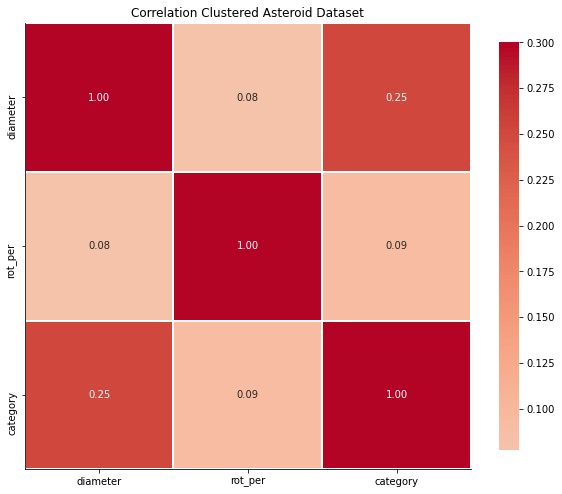

In [10]:
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,15)
plt.title('Correlation Clustered Asteroid Dataset')
plt.show()

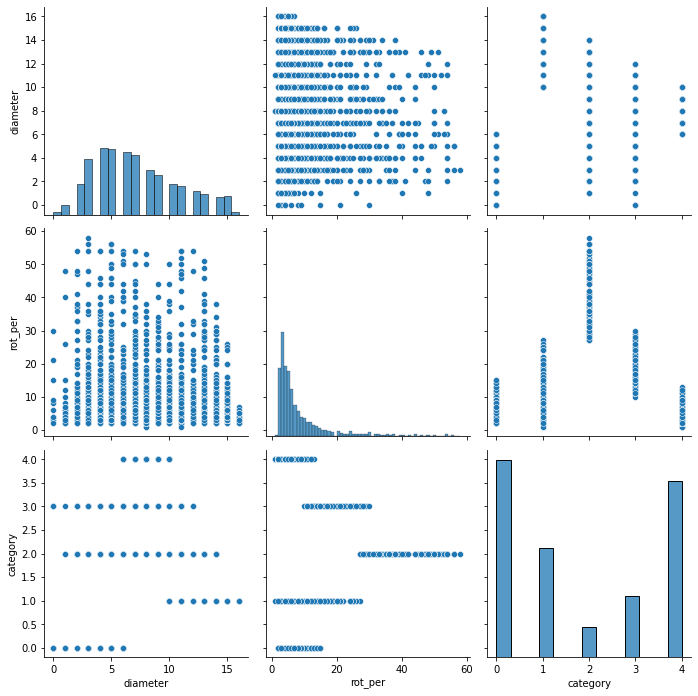

In [11]:
g = sns.pairplot(data, diag_kind="hist")
g.fig.set_size_inches(10,10)

# HPO Muller Loop Classification

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

In [41]:
data['name']

0         31
1        183
2       2787
3       1601
4        382
        ... 
3046     410
3047    2855
3048    2196
3049      34
3050    1561
Name: name, Length: 3051, dtype: int64

In [52]:
X = data[['name','diameter', 'rot_per']]
y = data['category']

In [53]:
X

,name,diameter,rot_per
0,31,9,6
1,183,12,5
2,2787,14,17
3,1601,11,4
4,382,9,13
...,...,...,...
3046,410,1,3
3047,2855,4,8
3048,2196,1,7
3049,34,0,21


In [54]:
# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

## DecisionTreeClassifier(max_depth=5)
##  MLPClassifier(solver='adam',alpha=1, max_iter=1000)
Data Narrative: Classification Accuracy above 95%
MLP got the highest accuracy of 97.48

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Decision Tree", "MLP Neural Net"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000)
    ]
output = pd.DataFrame(columns=['classifier', 'mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)

    y_predict = clf.predict(X_test)

    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
  
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

display(output)

Classifier = Decision Tree, Score (test, accuracy) = 95.63
Classifier = MLP Neural Net, Score (test, accuracy) = 97.38
--------------------------------------------------------------------------------
Best --> Classifier = MLP Neural Net, Score (test, accuracy) = 97.38


,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,0.11,0.32,0.89,95.633188
1,MLP Neural Net,0.07,0.24,0.91,97.379913


## DecisionTreeClassifier(max_depth=6),
##  MLPClassifier(solver='sgd',alpha=1, max_iter=1000)
Data Narrative: Classification Accuracy above 95%
Decision Tree got the highest accuracy of 97.27

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Decision Tree", "MLP Neural Net"]

classifiers = [
    DecisionTreeClassifier(max_depth=6),
    MLPClassifier(solver='sgd',alpha=1, max_iter=1000)
    ]
output = pd.DataFrame(columns=['classifier', 'mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)

    y_predict = clf.predict(X_test)

    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
  
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

display(output)

Classifier = Decision Tree, Score (test, accuracy) = 95.96
Classifier = MLP Neural Net, Score (test, accuracy) = 97.38
--------------------------------------------------------------------------------
Best --> Classifier = MLP Neural Net, Score (test, accuracy) = 97.38


,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,0.11,0.32,0.89,95.960699
1,MLP Neural Net,0.07,0.21,0.93,97.379913


## DecisionTreeClassifier(max_depth=7),
##  MLPClassifier(solver='lbfgs',alpha=1, max_iter=1000)
Data Narrative: Classification Accuracy above 95%

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Decision Tree", "MLP Neural Net"]

classifiers = [
    DecisionTreeClassifier(max_depth=6),
    MLPClassifier(solver='lbfgs',alpha=1, max_iter=1000)
    ]
output = pd.DataFrame(columns=['classifier', 'mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)

    y_predict = clf.predict(X_test)

    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
  
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

display(output)

Classifier = Decision Tree, Score (test, accuracy) = 96.62
Classifier = MLP Neural Net, Score (test, accuracy) = 97.49
--------------------------------------------------------------------------------
Best --> Classifier = MLP Neural Net, Score (test, accuracy) = 97.49


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,0.09,0.31,0.89,96.615721
1,MLP Neural Net,0.08,0.29,0.90,97.489083


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f9aef13d0>,
      dtype=object)

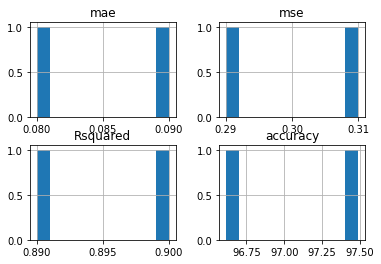

In [59]:
output.hist()